In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!nvidia-smi

Sun Dec  4 00:59:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%%time
# install dependencies: (use cu101 because colab has CUDA 10.1)
# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# dependencies for kaggle notebook
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 593 kB 29.6 MB/s 
     |████████████████████████████████| 190 kB 68.9 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.7.0-cp38-cp38-linux_x86_64.whl size=25629469 sha256=fa98b71fc80c85ca794dfb78c183ef096c569079e13e39e4c0ea172c7f9b4d67
  Stored in directory: /root/.cache/pip/wheels/af/c2/d1/17f8254de688113bae94f7daf3a3dbe8a18be39dc46b9a45b6
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 32666, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 32666 (delta 69), reused 100 (delta 22), pack-reused 32466
Receiving objects: 100% (32666/32666), 47.77 MiB | 30.03 MiB/s, done.
Resolving deltas: 100% (230

CPU times: user 10.8 s, sys: 1.57 s, total: 12.3 s
Wall time: 29min 55s


In [ ]:
%%time
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.12.1+cu113 True
2.26.0
11.2
GCC 7.5
CPU times: user 2.43 s, sys: 800 ms, total: 3.23 s
Wall time: 4.91 s


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [ ]:
!mkdir checkpoints
# !wget -c http://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20200307-a92d2092.pth \
!wget -c https://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20210803_015428-d231a06e.pth \
      -O checkpoints/ssd300_coco_20210803_015428-d231a06e.pth

--2022-12-04 01:30:09--  https://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20210803_015428-d231a06e.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.15
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137242646 (131M) [application/octet-stream]
Saving to: ‘checkpoints/ssd300_coco_20210803_015428-d231a06e.pth’

checkpoints/ssd300_ 100%[===================>] 130.88M  10.1MB/s    in 14s     

2022-12-04 01:30:23 (9.68 MB/s) - ‘checkpoints/ssd300_coco_20210803_015428-d231a06e.pth’ saved [137242646/137242646]



In [ ]:
!ls checkpoints

ssd300_coco_20210803_015428-d231a06e.pth


load checkpoint from local path: checkpoints/ssd300_coco_20210803_015428-d231a06e.pth


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


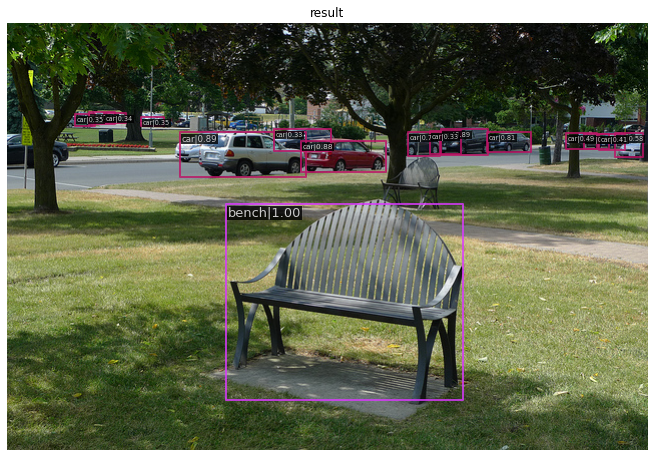

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = 'demo/demo.jpg'
config = 'configs/ssd/ssd300_coco.py'
checkpoint = 'checkpoints/ssd300_coco_20210803_015428-d231a06e.pth'
model = init_detector(config, checkpoint, device='cuda:0')
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)

In [ ]:
import os

# download, decompress the data
!mkdir house_numbers
!wget http://ufldl.stanford.edu/housenumbers/train.tar.gz
!wget http://ufldl.stanford.edu/housenumbers/test.tar.gz
!tar -zxf train.tar.gz 
!tar -zxf test.tar.gz
!mv train house_numbers/
!mv test house_numbers/

len(os.listdir('house_numbers/train')), len(os.listdir('house_numbers/test'))

--2022-12-04 01:34:41--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 385.42M  36.6MB/s    in 13s     

2022-12-04 01:34:54 (29.3 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]

--2022-12-04 01:34:54--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  27.5MB/s    in 11s     

2022-12-04 01:35:05 (24.8 MB/s) - ‘test.tar.gz’ saved [276555967/2

(33404, 13070)

In [ ]:
!pip install pymatreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pymatreader import read_mat

train_anno = read_mat('house_numbers/train/digitStruct.mat')
test_anno = read_mat('house_numbers/test/digitStruct.mat')

train_anno['digitStruct']['name'][0], train_anno['digitStruct']['bbox'][0]

('1.png',
 {'label': [1.0, 9.0],
  'width': [81.0, 96.0],
  'top': [77.0, 81.0],
  'left': [246.0, 323.0],
  'height': [219.0, 219.0]})

In [ ]:
import json

with open('house_numbers/train/filenames.json', 'w') as filenames:
     filenames.write(json.dumps(train_anno['digitStruct']['name']))
with open('house_numbers/train/ann_file.json', 'w') as ann_file:
     ann_file.write(json.dumps(train_anno['digitStruct']['bbox']))
     
with open('house_numbers/test/filenames.json', 'w') as filenames:
     filenames.write(json.dumps(test_anno['digitStruct']['name']))
with open('house_numbers/test/ann_file.json', 'w') as ann_file:
     ann_file.write(json.dumps(test_anno['digitStruct']['bbox']))

In [ ]:
with open('house_numbers/train/filenames.json', 'r') as ann_file:
     filenames = json.load(ann_file)

with open('house_numbers/train/ann_file.json', 'r') as json_file:
    anno = json.load(json_file)

filenames[0], anno[0]

('1.png',
 {'label': [1.0, 9.0],
  'width': [81.0, 96.0],
  'top': [77.0, 81.0],
  'left': [246.0, 323.0],
  'height': [219.0, 219.0]})

In [ ]:
lst = []
for i in range(len(anno)):
    if type(anno[i]['label']) == float:
        lst.append(anno[i]['label'])
    else:
        for j in range(len(anno[i]['label'])):
            lst.append(anno[i]['label'][j])
print(f'Labels: {list(set(lst))}')

Labels: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


(350, 741, 3)


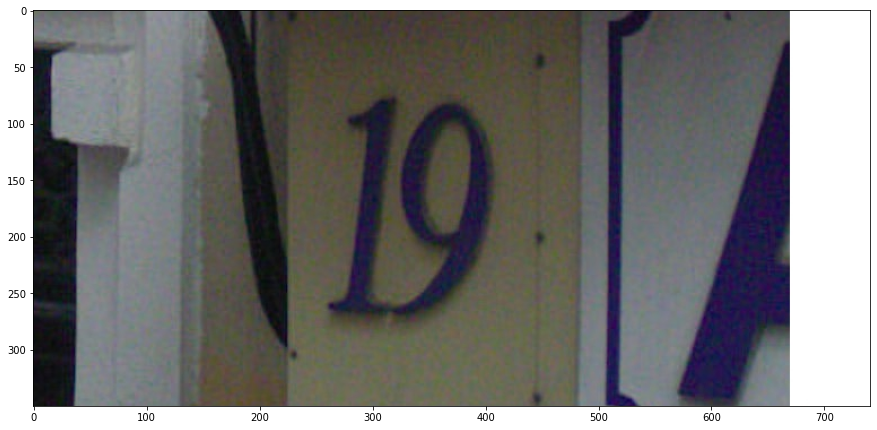

In [ ]:
import mmcv
import matplotlib.pyplot as plt

img_name = '1.png'
img = mmcv.imread('house_numbers/train/' + img_name)
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
print(img.shape)
plt.show()

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset
import json
# from pymatreader import read_mat

@DATASETS.register_module()
class HouseNumbersDataset(CustomDataset):

    CLASSES = list(map(str, range(1, 11)))

    def load_annotations(self, ann_file):
        
        with open(f'{self.data_root}train/filenames.json', 'r') as anno_file:
            image_list = json.load(anno_file)
        
        with open(f'{self.ann_file}', 'r') as json_file:
            bbox_list = json.load(json_file)
        
        data_infos = []
 
        for image_id, bbox_id in zip(image_list, bbox_list):
            
            filename = f'{self.img_prefix}/{image_id}'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
            data_info = dict(filename=f'{image_id}', width=width, height=height)

            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []

            if type(bbox_id['label']) == float:
                gt_bboxes.append([bbox_id['left'], bbox_id['top'], bbox_id['left'] + bbox_id['width'], bbox_id['top'] + bbox_id['height']])
                gt_labels.append(bbox_id['label']-1)
            else:  
                for i, label in enumerate(bbox_id['label']):
                    gt_bboxes.append([bbox_id['left'][i], bbox_id['top'][i], bbox_id['left'][i] + bbox_id['width'][i], bbox_id['top'][i] + bbox_id['height'][i]])
                    gt_labels.append(label-1)

            data_anno = dict(
                    bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                    labels=np.array(gt_labels, dtype=np.long),
                    bboxes_ignore=np.array(gt_bboxes_ignore,
                                           dtype=np.float32).reshape(-1, 4),
                    labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [ ]:
from mmcv import Config

model_type = "ssd"

if model_type == "ssd":
  cfg = Config.fromfile('./configs/ssd/ssd300_coco.py')

In [ ]:
cfg["data"]

{'samples_per_gpu': 8,
 'workers_per_gpu': 3,
 'train': {'type': 'RepeatDataset',
  'times': 5,
  'dataset': {'type': 'CocoDataset',
   'ann_file': 'data/coco/annotations/instances_train2017.json',
   'img_prefix': 'data/coco/train2017/',
   'pipeline': [{'type': 'LoadImageFromFile'},
    {'type': 'LoadAnnotations', 'with_bbox': True},
    {'type': 'Expand',
     'mean': [123.675, 116.28, 103.53],
     'to_rgb': True,
     'ratio_range': (1, 4)},
    {'type': 'MinIoURandomCrop',
     'min_ious': (0.1, 0.3, 0.5, 0.7, 0.9),
     'min_crop_size': 0.3},
    {'type': 'Resize', 'img_scale': (300, 300), 'keep_ratio': False},
    {'type': 'RandomFlip', 'flip_ratio': 0.5},
    {'type': 'PhotoMetricDistortion',
     'brightness_delta': 32,
     'contrast_range': (0.5, 1.5),
     'saturation_range': (0.5, 1.5),
     'hue_delta': 18},
    {'type': 'Normalize',
     'mean': [123.675, 116.28, 103.53],
     'std': [1, 1, 1],
     'to_rgb': True},
    {'type': 'DefaultFormatBundle'},
    {'type': 'Col

In [ ]:
from mmdet.apis import set_random_seed

cfg.dataset_type = 'HouseNumbersDataset'
cfg.data_root = 'house_numbers/'

cfg.data.test.type = 'HouseNumbersDataset'
cfg.data.test.data_root = 'house_numbers/'
cfg.data.test.ann_file = 'test/ann_file.json'
cfg.data.test.img_prefix = 'test/'

if model_type == "ssd":
  cfg.data.train.dataset.type = 'HouseNumbersDataset'
  cfg.data.train.dataset.data_root = 'house_numbers/'
  cfg.data.train.dataset.ann_file = 'train/ann_file.json'
  cfg.data.train.dataset.img_prefix = 'train/'
elif model_type == "mask_rcnn":
  cfg.data.train.type = 'HouseNumbersDataset'
  cfg.data.train.data_root = 'house_numbers/'
  cfg.data.train.ann_file = 'train/ann_file.json'
  cfg.data.train.img_prefix = 'train/'

cfg.data.val.type = 'HouseNumbersDataset'
cfg.data.val.data_root = 'house_numbers/'
cfg.data.val.ann_file = 'test/ann_file.json'
cfg.data.val.img_prefix = 'test/'

if model_type == "ssd":
  cfg.model.bbox_head.num_classes = 10
#   cfg.load_from = 'checkpoints/ssd300_coco_20210803_015428-d231a06e.pth'
  cfg.resume_from = 'weights/epoch_5.pth'

cfg.work_dir = './weights'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
# ssd300_coco and ssd300_voc with 4gpu, 24 imgs per gpu and lr of 3e-3
cfg.optimizer.lr = 0.02 / 8.  # 3e-3
# cfg.lr_config.warmup = None
cfg.lr_config.policy = 'step'
cfg.lr_config.warmup = 'linear'
cfg.lr_config.warmup_ratio = 1.0 / 1e10
cfg.runner.max_epochs = 5
cfg.log_config.interval = 4000

cfg.evaluation.metric = 'mAP'
cfg.evaluation.interval = 1
cfg.checkpoint_config.interval = 1

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device='cuda'
cfg.gpu_ids = range(1)

print(f'Config:\n{cfg.pretty_text}')

Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    backbone=dict(
        type='SSDVGG',
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://vgg16_caffe')),
    neck=dict(
        type='SSDNeck',
        in_channels=(512, 1024),
        out_channels=(512, 1024, 512, 256, 256, 256),
        level_strides=(2, 2, 1, 1),
        level_paddings=(1, 1, 0, 0),
        l2_norm_scale=20),
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=10,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(

In [ ]:
# from mmdet.datasets import build_dataset
# from mmdet.models import build_detector
# from mmdet.apis import train_detector


# datasets = [build_dataset(cfg.data.train)]
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model.CLASSES = datasets[0].CLASSES

# mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# train_detector(model, datasets, cfg, distributed=False, validate=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int`

[>>>>>>>>>>>>>>>>>>>>>>>>] 13068/13068, 66.5 task/s, elapsed: 197s, ETA:     0s
---------------iou_thr: 0.5---------------


2022-11-30 01:33:59,697 - mmdet - INFO - 
+-------+------+-------+--------+-------+
| class | gts  | dets  | recall | ap    |
+-------+------+-------+--------+-------+
| 1     | 5099 | 63670 | 0.899  | 0.635 |
| 2     | 4149 | 14998 | 0.921  | 0.818 |
| 3     | 2882 | 10247 | 0.884  | 0.758 |
| 4     | 2523 | 15731 | 0.918  | 0.791 |
| 5     | 2384 | 11207 | 0.940  | 0.823 |
| 6     | 1977 | 10210 | 0.930  | 0.796 |
| 7     | 2019 | 12789 | 0.916  | 0.792 |
| 8     | 1660 | 6264  | 0.907  | 0.812 |
| 9     | 1595 | 6501  | 0.915  | 0.798 |
| 10    | 1744 | 13235 | 0.938  | 0.780 |
+-------+------+-------+--------+-------+
| mAP   |      |       |        | 0.780 |
+-------+------+-------+--------+-------+
2022-11-30 01:33:59,708 - mmdet - INFO - Epoch(val) [5][13068]	AP50: 0.7800, mAP: 0.7802


load checkpoint from local path: checkpoints/epoch_4.pth


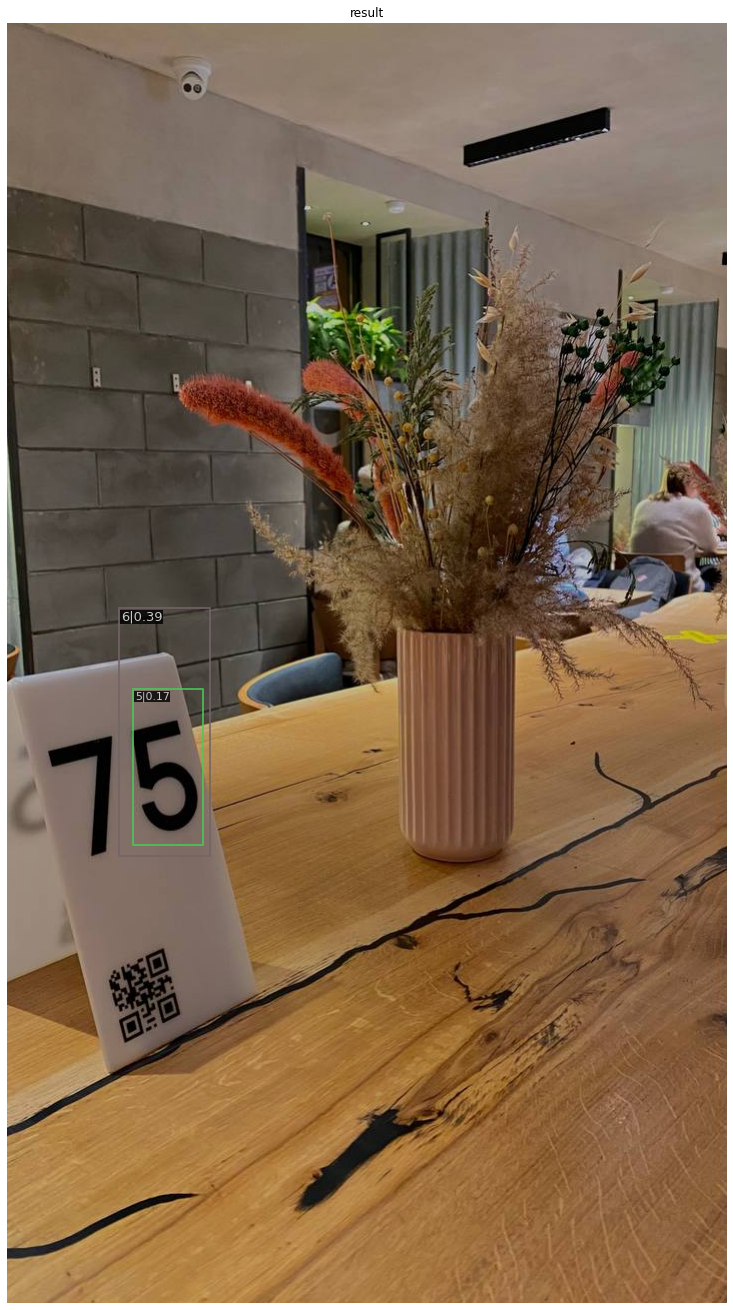

In [ ]:
img = mmcv.imread('2022-11-29 20.19.46.jpg')
checkpoint = 'checkpoints/epoch_4.pth'
model = init_detector(cfg, checkpoint, device='cuda:0')
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.15)